In [5]:
import numpy as np
import os
import matplotlib.pyplot as plt

## Loading the data

In [6]:
data = np.load('data.npy')

In [7]:
x = data[:,0:2]
y = data[:,2]


## Data Visualization

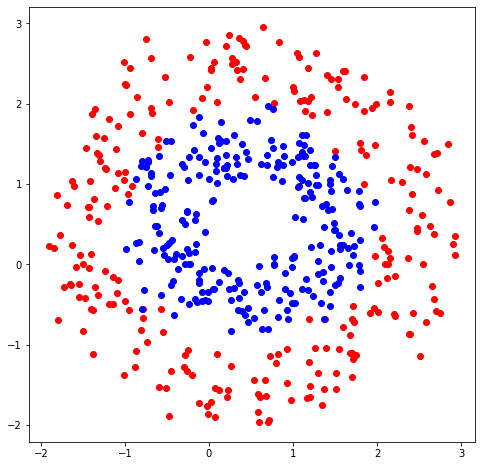

In [8]:
plt.figure(figsize = (8,8))
plt.scatter(x[:252,0], x[:252,1], c = 'r')
plt.scatter(x[252:,0], x[252:,1], c = 'b')

## Running a model

In [9]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x,y.ravel())
sklearn_predictions = LR.predict(x)
accuracy = (sum([1 if y[i]==sklearn_predictions[i] else 0 for i in range(y.shape[0])])/y.shape[0])*100
accuracy

47.42063492063492

## Let's Do Feature Engineering

This is essentially a space transformation operation in mathematical language

In [8]:
feature_1 = np.sqrt(x[:,0]**2 + x[:,1]**2).reshape(-1,1)
feature_2 = np.arctan(x[:,1], x[:,0]).reshape(-1,1)

In [9]:
x_featurized = np.hstack((feature_1, feature_2))

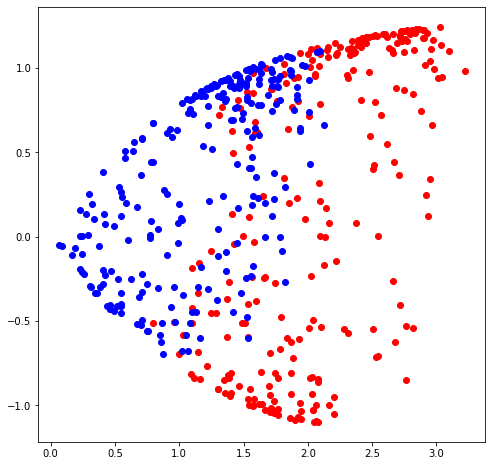

In [10]:
plt.figure(figsize = (8,8))
plt.scatter(x_featurized[:252,0], x_featurized[:252,1], c = 'r')
plt.scatter(x_featurized[252:,0], x_featurized[252:,1], c = 'b')

## Now, lets try again

In [11]:
LR = LogisticRegression()
LR.fit(x_featurized,y.ravel())
sklearn_predictions = LR.predict(x_featurized)
accuracy = (sum([1 if y[i]==sklearn_predictions[i] else 0 for i in range(y.shape[0])])/y.shape[0])*100
accuracy

86.30952380952381

# Lets try a real-life example

In [12]:
signals = np.load('signal_data.npy')
labels = np.load('signal_data_labels.npy')

In [13]:
signals.shape

(2800, 1600)

## Data Visualization

label 1.0


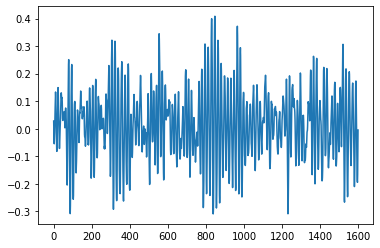

In [14]:
print('label',labels[500])
plt.plot(signals[500])

label 3.0


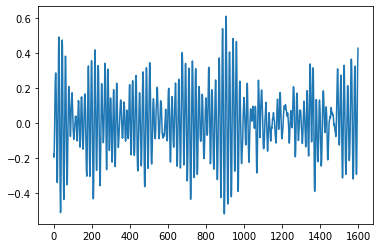

In [15]:
print('label',labels[1000])
plt.plot(signals[1000])

label 5.0


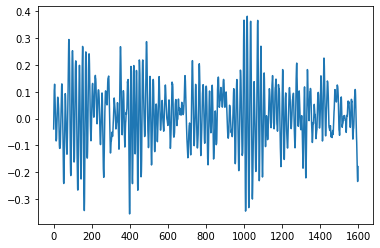

In [16]:
print('label',labels[1500])
plt.plot(signals[1500])

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
knn=KNeighborsClassifier(n_neighbors=4)
score = cross_val_score(knn, signals, labels, cv=2)
np.mean(np.array(score))

0.23214285714285715

## Lets extract some statistical features

In [18]:
# We will extract a few simple features

In [19]:
f1 = np.mean(signals, axis = 1).reshape(-1,1)
f2 = np.max(abs(signals), axis = 1).reshape(-1,1)
f3 = np.std(signals, axis = 1).reshape(-1,1)
f4 = np.min(signals, axis = 1).reshape(-1,1)
f5 = np.max(signals, axis = 1).reshape(-1,1)


In [20]:
# plt.bar([1,2,3,4,5],[f1[0],f2[0],f3[0],f4[0],f5[0]])
print([np.round(f1[0][0],5),np.round(f2[0][0],5),np.round(f3[0][0],5),np.round(f4[0][0],5),np.round(f5[0][0],5)])

[0.0137, 0.17983, 0.05957, -0.17565, 0.17983]


Using **2 features**

In [21]:
signals_features = np.hstack((f1, f2))

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
knn=KNeighborsClassifier(n_neighbors=5)
score = cross_val_score(knn, signals_features, labels, cv=5)
s1 = np.mean(np.array(score))
print(s1)

0.6089285714285715


Using **all 5 features**

In [23]:
signals_features = np.hstack((f1, f2, f3, f4, f5))
knn=KNeighborsClassifier(n_neighbors=5)
score = cross_val_score(knn, signals_features, labels, cv=5)
s1 = np.mean(np.array(score))
print(s1)

0.7267857142857143
